介绍神经网络的学习中的一些重要观点，主题涉及寻找最优权重参数的最优化方法、权重参数的初始值、超参数的设定方法。为了应对过拟合，本章还将介绍权值衰减、Dropout等正则化方法，并进行实现。最后将对近年来众多研究中使用的Batch Normalization方法进行简单的介绍。

### SGD

In [ ]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

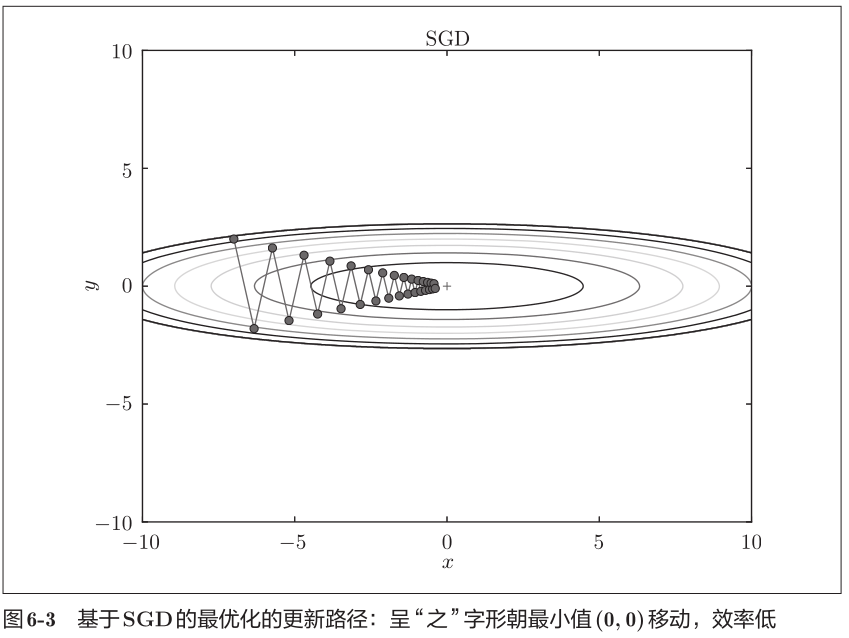
SGD的缺点是，如果函数的形状非均向（anisotropic），比如呈延伸状，搜索的路径就会非常低效。因此，我们需要比单纯朝梯度方向前进的SGD更聪明的方法。SGD低效的根本原因是，梯度的方向并没有指向最小值的方向。

### Momentum

In [ ]:
class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items(): # 为每个参数初始化一个动量
            self.v[key] = np.zeros_like(val)
        for key in params.keys():
            self.v[key] = self.momentum*self.v[key] - self.lr*grads[key]
            params[key] += self.v[key]

### AdaGrad

In [ ]:
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7) # 加上一个微小值防止除数为0

### Adam
Adam=AdaGrad+Momentum

(array([  6.,  31.,  86., 199., 278., 236., 116.,  38.,   8.,   2.]),
 array([-3.28778316, -2.5773946 , -1.86700604, -1.15661749, -0.44622893,
         0.26415963,  0.97454819,  1.68493675,  2.39532531,  3.10571387,
         3.81610243]),
 <BarContainer object of 10 artists>)

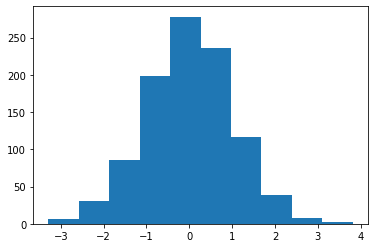

In [1]:
import numpy as np
import matplotlib.pyplot as plt

a = np.random.randn(1000)
plt.hist(a)